# Installation

In [ ]:
pip install pandas
pip install scikit-learn
pip install nltk
pip install mlxtend

# Preprocess Data

In [1]:
import numpy as np 
import pandas as pd


df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Drop unused column

In [2]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Raname column name

In [3]:
df = df.rename(columns={
    'v1': 'label',
    'v2': 'text'
})

df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Encode the label

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/athenaai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
from nltk.tokenize import word_tokenize

df['text'].apply(word_tokenize)


0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5572, dtype: object

In [7]:
import re
def clean_text(text):
    text = text.lower()

    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['text'] = df['text'].apply(clean_text)

## Using CountVectorizer (Feature Selection)

In [9]:

from sklearn.feature_extraction.text import CountVectorizer

# Convert text to a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

# Labels
y = df['label']

## Split dataset

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# SVC Model

In [27]:
from sklearn import svm

model = svm.SVC(kernel='linear')

model.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = model.predict(X_test) 

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9808612440191388


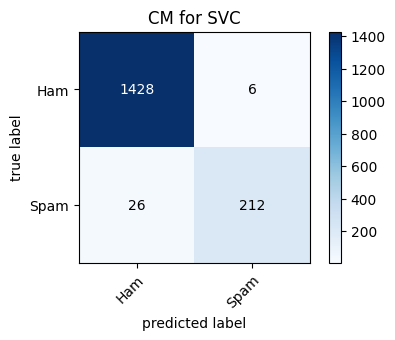

In [29]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

cm_rnf = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                               class_names = ['Ham' , 'Spam' ],
                               figsize=(5, 3))
plt.title("CM for SVC")
plt.show()

# Multinomial Naive Bayes

In [30]:
# Multinomial Naive Bayes model 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(X_train, y_train)  # Train the model

prediction = multinomial_nb_model.predict(X_test)

print("Multinomial NB")
print(f"Accuracy score: {accuracy_score(y_test, prediction)}")

Multinomial NB
Accuracy score: 0.9712918660287081


In [31]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred = multinomial_nb_model.predict(X_test) 

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9712918660287081


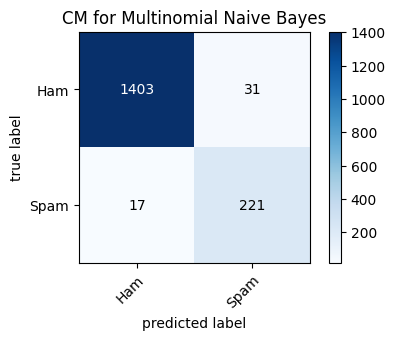

In [32]:

cm_rnf = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                               class_names = ['Ham' , 'Spam' ],
                               figsize=(5, 3))
plt.title("CM for Multinomial Naive Bayes")
plt.show()

# GaussianNB

In [21]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Initialize algorithms
gnb = GaussianNB()

gnb.fit(X_train, y_train)

gnb_preds = gnb.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, gnb_preds))

Accuracy: 0.873542600896861


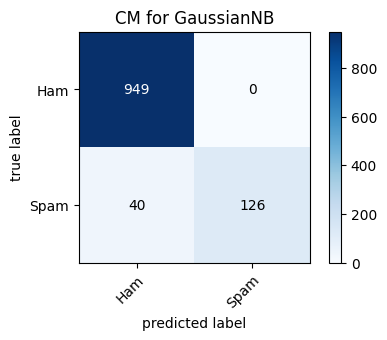

In [24]:
cm_rnf = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                               class_names = ['Ham' , 'Spam' ],
                               figsize=(5, 3))
plt.title("CM for GaussianNB")
plt.show()

# DecisionTreeClassifier

In [33]:

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_preds = dtc.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, dtc_preds))

Accuracy: 0.9665071770334929


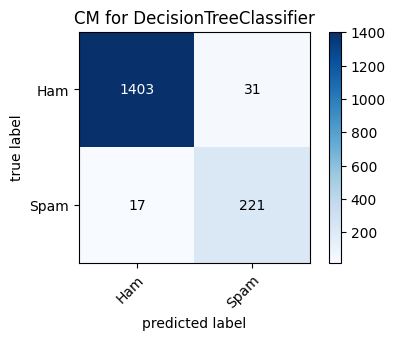

In [34]:
cm_rnf = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                               class_names = ['Ham' , 'Spam' ],
                               figsize=(5, 3))
plt.title("CM for DecisionTreeClassifier")
plt.show()

# Comparison

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Convert text to a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

# Labels
y = df['label']

# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize algorithms
gnb = GaussianNB()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()

# Train models and make predictions
models = {'Naive Bayes': gnb, 'Multinomial Naive Bayes': mnb, 'Decision Tree': dtc}
predictions = {}
accuracies = {}

for name, model in models.items():
    if name == 'Naive Bayes':
        model.fit(X_train.toarray(), y_train)
        predictions[name] = model.predict(X_test.toarray())
    else:
        model.fit(X_train, y_train)
        predictions[name] = model.predict(X_test)
    
    accuracies[name] = accuracy_score(y_test, predictions[name])

# Evaluate accuracy and confusion matrix for Multinomial Naive Bayes
accuracies, confusion_matrix(y_test, predictions['Multinomial Naive Bayes'])





({'Naive Bayes': 0.8971291866028708,
  'Multinomial Naive Bayes': 0.972488038277512,
  'Decision Tree': 0.9569377990430622},
 array([[1428,   25],
        [  21,  198]]))

In [6]:
confusion_matrix(y_test, predictions['Naive Bayes'])

array([[1311,  142],
       [  18,  201]])

In [7]:
predictions

{'Naive Bayes': array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4'),
 'Multinomial Naive Bayes': array(['spam', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4'),
 'Decision Tree': array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)}

In [8]:
confusion_matrix(y_test, predictions['Decision Tree'])


array([[1432,   21],
       [  35,  184]])